In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th{border: 1px 
black solid ! important;color:black !important;}

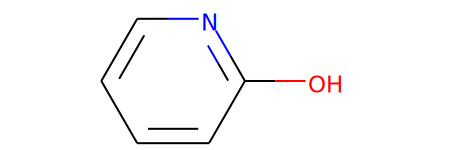

In [2]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
# Create mol object from smiles string
mol = Chem.MolFromSmiles('c1cccnc1O')
molSize=(450,150)
mc = Chem.Mol(mol.ToBinary())
if not mc.GetNumConformers():
#Compute 2D coordinates
    rdDepictor.Compute2DCoords(mc)
# init the drawer with the size
drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],
                                  molSize[1])
#draw the molcule
drawer.DrawMolecule(mc)
drawer.FinishDrawing()
# get the SVG string
svg = drawer.GetDrawingText()
# fix the svg string and display it
display(SVG(svg.replace('svg:','')))

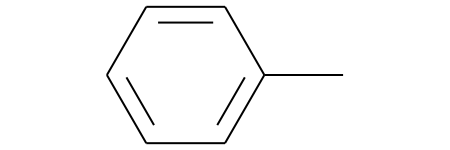

In [3]:
from IPython.display import SVG
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
# Create mol object from smiles string
mol = Chem.MolFromSmiles('CC1=CC=CC=C1')
molSize=(450,150)
mc = Chem.Mol(mol.ToBinary())
if not mc.GetNumConformers():
#Compute 2D coordinates
    rdDepictor.Compute2DCoords(mc)
# init the drawer with the size
drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],
                                  molSize[1])
#draw the molcule
drawer.DrawMolecule(mc)
drawer.FinishDrawing()
# get the SVG string
svg = drawer.GetDrawingText()
# fix the svg string and display it
display(SVG(svg.replace('svg:','')))

In [4]:
from rdkit import Chem
def inchi_to_mol_file(inchi, name):
    """Converts inchi to mol, also returns mol
    
    Args:
        inchi (string): inchi to convert
        name (string): name of molecule, will be used in filename
    
    """
    
    #Read in the InChI, set the name of the molecule in memory, then create the MolBlock.
    molObj = Chem.MolFromInchi(inchi)
    molObj.SetProp("_Name",name)
    imported = Chem.MolToMolBlock(molObj)
    
    #Writes the MolBlock to a .mol file
    with open(f"../mols/{name}.mol", "w") as newfile:
        newfile.write(imported)
    
    #Also return the mol in case we want to store a variable
    return (imported)

In [5]:
from rdkit import Chem
#from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem.Draw import IPythonConsole
import rdkit
import time
import pandas as pd
print(rdkit.__version__)
print(time.asctime())

2020.03.4
Thu Nov  5 11:43:04 2020


In [6]:
import ipywidgets as widgets
from traitlets import Unicode, Int, validate
class MolSVGWidget(widgets.DOMWidget):
    _view_name = Unicode('MolSVGView').tag(sync=True)
    _view_module = Unicode('molsvg_widget').tag(sync=True)
    _view_module_version = Unicode('0.0.1').tag(sync=True)
     
    svg = Unicode('', help="svg to be rendered").tag(sync=True)
    #selected_atoms = Unicode('', help="list of currently selected atoms").tag(sync=True)
    clicked_atom_idx = Unicode('', help="The index of the atom that was just clicked").tag(sync=True)

In [7]:
%%javascript
// make sure our module is only defined
// only once.
require.undef('molsvg_widget');

// Define the `molsvg_widget` module using the Jupyter widgets framework.
define('molsvg_widget', ["@jupyter-widgets/base"],
       function(widgets) {

    // The frontend class:
    var MolSVGView = widgets.DOMWidgetView.extend({

        // This method creates the HTML widget.
        render: function() {
            this.svg_div = document.createElement('div');
            this.el.appendChild(this.svg_div);
            this.model.on('change:svg', this.svg_changed, this);
            this.svg_changed();
        },
        
        // called when the SVG is updated on the Python side
        svg_changed: function() {
            var txt = this.model.get('svg'); 
            this.svg_div.innerHTML = txt;
            var sels = this.svg_div.getElementsByClassName("atom-selector");
            for(var i=0;i<sels.length;i++){
                sels[i].onclick = (evt) => { return this.atom_clicked(evt) };
            }
            
        },

        // callback for when an atom is clicked
        atom_clicked: function(evt) {
            //alert("  "+evt+"|"+this);
            if(!evt.currentTarget.getAttribute('class')){
                return;
            }
            var satmid = evt.currentTarget.getAttribute('class').match(/atom-([0-9]+)/);
            if(satmid.length >1){
                var atmid = Number(satmid[1]);
                var curSel = this.model.get('selected_atoms');
                var splitSel = curSel.split(',');
                var selItms = [];
                var idx = -1;
                //alert("|"+atmid+"|"+curSel+"|len: "+splitSel.length);
                if(curSel != "" && splitSel.length>0){
                    selItms = Array.from(splitSel).map(item => Number(item));
                    idx = selItms.indexOf(atmid);
                }
                if(idx == -1){
                    selItms = selItms.concat(atmid);
                    evt.currentTarget.style["stroke-width"]=3;
                    evt.currentTarget.style["stroke-opacity"]=1;
                    evt.currentTarget.style["stroke"]='#AA22FF';
                } else {
                    selItms.splice(idx,1);
                    evt.currentTarget.style["stroke-width"]=1;
                    evt.currentTarget.style["stroke-opacity"]=0;
                    evt.currentTarget.style["stroke"]='#FFFFFF';
                }
                this.model.set('selected_atoms',String(selItms));
                this.touch();
            }
        }

    });

    return {
        MolSVGView : MolSVGView
    };
});

<IPython.core.display.Javascript object>

In [8]:
def mol_to_svg(mol):
    d = Draw.MolDraw2DSVG(350, 200)
    d.SetFontSize(0.8)
    d.DrawMolecule(mol)
    d.TagAtoms(mol)
    d.FinishDrawing()
    return d.GetDrawingText()


In [9]:
bilastine_smi = "O=C(O)C(c1ccc(cc1)CCN4CCC\
(c2nc3ccccc3n2CCOCC)CC4)(C)C"

In [10]:
bilastine = Chem.MolFromSmiles(bilastine_smi)
dbilastine = Draw.PrepareMolForDrawing(bilastine)

In [11]:
w = MolSVGWidget(svg=mol_to_svg(dbilastine));w

MolSVGWidget(svg='<?xml version=\'1.0\' encoding=\'iso-8859-1\'?>\n<svg version=\'1.1\' baseProfile=\'full\'\n…

In [12]:
#w.selected_atoms

In [13]:
celecoxib_pdb = Chem.MolFromPDBBlock("""\
HETATM18014  S1  CEL A 682      25.931 -21.467 -17.155  1.00 43.78           S  
HETATM18015  C15 CEL A 682      27.679 -21.706 -17.131  1.00 41.41           C  
HETATM18016  C14 CEL A 682      28.218 -22.829 -16.556  1.00 39.70           C  
HETATM18017  C13 CEL A 682      29.584 -22.964 -16.543  1.00 39.68           C  
HETATM18018  C12 CEL A 682      30.341 -21.967 -17.109  1.00 39.92           C  
HETATM18019  C17 CEL A 682      29.796 -20.853 -17.697  1.00 40.26           C  
HETATM18020  C16 CEL A 682      28.434 -20.714 -17.707  1.00 40.98           C  
HETATM18021  N2  CEL A 682      31.724 -22.006 -17.132  1.00 40.07           N  
HETATM18022  C3  CEL A 682      32.622 -22.574 -16.260  1.00 40.53           C  
HETATM18023  C5  CEL A 682      32.417 -23.237 -14.985  1.00 39.27           C  
HETATM18024  C10 CEL A 682      31.570 -22.735 -14.016  1.00 37.27           C  
HETATM18025  C9  CEL A 682      31.446 -23.390 -12.819  1.00 37.20           C  
HETATM18026  C8  CEL A 682      32.170 -24.541 -12.587  1.00 37.91           C  
HETATM18027  C11 CEL A 682      32.056 -25.290 -11.306  1.00 35.46           C  
HETATM18028  C7  CEL A 682      33.023 -25.030 -13.549  1.00 38.04           C  
HETATM18029  C6  CEL A 682      33.152 -24.373 -14.743  1.00 38.09           C  
HETATM18030  C2  CEL A 682      33.843 -22.337 -16.837  1.00 41.52           C  
HETATM18031  C1  CEL A 682      33.589 -21.637 -18.031  1.00 41.45           C  
HETATM18032  C4  CEL A 682      34.554 -21.135 -19.002  1.00 43.00           C  
HETATM18033  F3  CEL A 682      34.560 -21.752 -20.210  1.00 43.04           F  
HETATM18034  F2  CEL A 682      34.302 -19.828 -19.223  1.00 45.98           F  
HETATM18035  F1  CEL A 682      35.816 -21.214 -18.544  1.00 43.55           F  
HETATM18036  N1  CEL A 682      32.290 -21.424 -18.201  1.00 41.09           N  
HETATM18037  N3  CEL A 682      25.378 -22.226 -18.605  1.00 42.37           N  
HETATM18038  O2  CEL A 682      25.772 -20.039 -17.291  1.00 45.34           O  
HETATM18039  O1  CEL A 682      25.436 -22.106 -15.949  1.00 45.63           O  
""")

In [14]:
[a.SetProp("AtomLabel", a.GetPDBResidueInfo().GetName().strip())
 for a in celecoxib_pdb.GetAtoms()];

In [15]:
Chem.CreateAtomStringPropertyList(celecoxib_pdb, "AtomLabel")
Chem.CreateAtomDoublePropertyList(celecoxib_pdb, "TemperatureFactor")

In [16]:
import sys,os
w = Chem.SDWriter(sys.stdout)

In [17]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
import rdkit
print(rdkit.__version__)

2020.03.4


###### Créer une molécule

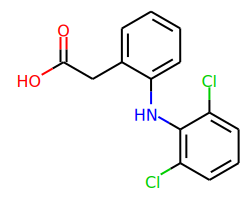

In [18]:
diclofenac = Chem.MolFromSmiles(
    'O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl')
d2d = rdMolDraw2D.MolDraw2DSVG(250,200)
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

##### Atomes

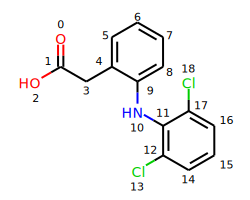

In [19]:
d2d = rdMolDraw2D.MolDraw2DSVG(250,200)
d2d.drawOptions().addAtomIndices=True
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

##### Liens et indices des  atomes

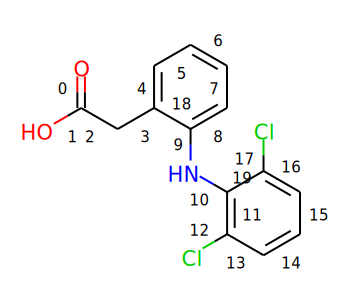

In [20]:
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().addBondIndices=True
d2d.DrawMolecule(diclofenac)
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

#####  Notes et annotations

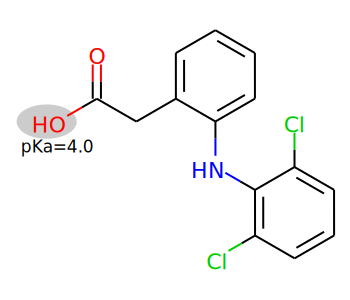

In [21]:
cp = Chem.Mol(diclofenac)
cp.GetAtomWithIdx(2).SetProp("atomNote","pKa=4.0")
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().setHighlightColour((0.8,0.8,0.8))
d2d.DrawMolecule(cp,highlightAtoms=[2])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

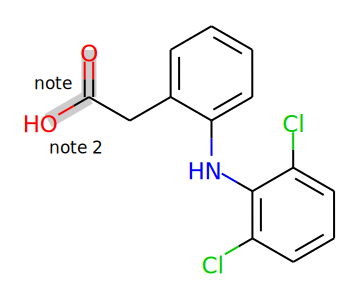

In [22]:
cp = Chem.Mol(diclofenac)
cp.GetBondWithIdx(0).SetProp("bondNote","note")
cp.GetBondWithIdx(1).SetProp("bondNote","note 2")
d2d = rdMolDraw2D.MolDraw2DSVG(350,300)
d2d.drawOptions().setHighlightColour((0.8,0.8,0.8))
d2d.DrawMolecule(cp,highlightAtoms=[],highlightBonds=[0,1])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

##### Stéréochimie

Deux énantiomères de thréonine

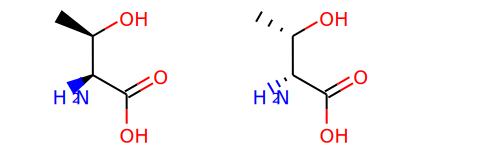

In [23]:
l_threonine = Chem.MolFromSmiles('C[C@@H](O)[C@H]\
(N)C(O)=O')
d_threonine = Chem.MolFromSmiles('C[C@H](O)[C@@H]\
(N)C(O)=O')
d2d = rdMolDraw2D.MolDraw2DSVG(500,150,200,150)
d2d.DrawMolecules([l_threonine,d_threonine])
d2d.FinishDrawing();SVG(d2d.GetDrawingText())

##### Libellés des stéréos  absolues

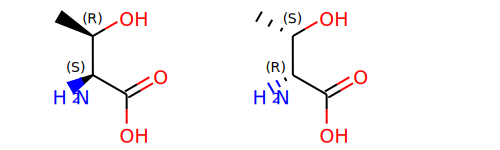

In [24]:
d2d = rdMolDraw2D.MolDraw2DSVG(500,150,200,150)
d2d.drawOptions().addStereoAnnotation=True
d2d.DrawMolecules([l_threonine,d_threonine])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

##### Diastéromeurs de ma thréonine

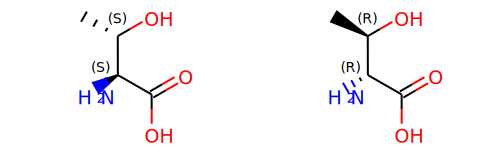

In [25]:
l_allothreonine = Chem.MolFromSmiles('C[C@H](O)[C@H]\
(N)C(O)=O')
d_allothreonine = Chem.MolFromSmiles('C[C@@H](O)[C@@H]\
(N)C(O)=O')
d2d = rdMolDraw2D.MolDraw2DSVG(500,150,250,150)
d2d.drawOptions().addStereoAnnotation=True
d2d.DrawMolecules([l_allothreonine,d_allothreonine])
d2d.FinishDrawing();SVG(d2d.GetDrawingText())

##### Mise à l'échelle 

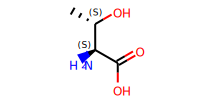

In [26]:
d2d = rdMolDraw2D.MolDraw2DSVG(200,100)
d2d.drawOptions().addStereoAnnotation=True
d2d.drawOptions().fixedBondLength=30
d2d.DrawMolecule(l_allothreonine)
d2d.FinishDrawing();SVG(d2d.GetDrawingText())

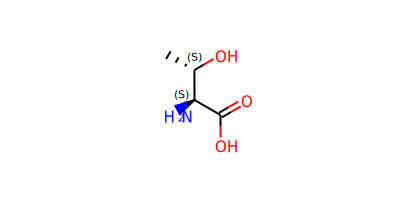

In [27]:
d2d = rdMolDraw2D.MolDraw2DSVG(400,200)
d2d.drawOptions().addStereoAnnotation=True
d2d.drawOptions().fixedBondLength=30
d2d.DrawMolecule(l_allothreonine)
d2d.FinishDrawing();SVG(d2d.GetDrawingText())

In [28]:
def addEnhancedStereoAnnotations(m):
    gpLookup = {Chem.StereoGroupType.STEREO_OR:"or",
                Chem.StereoGroupType.STEREO_AND:"&",
                Chem.StereoGroupType.STEREO_ABSOLUTE:"abs",
               }
    sgs = m.GetStereoGroups()
    for i,sg in enumerate(sgs):
        typ = gpLookup[sg.GetGroupType()]
        for at in sg.GetAtoms():
            nt = ""
            if at.HasProp("atomNote"):
                nt += at.GetProp("atomNote")+","
            nt += f"{typ}{i+1}"
            at.SetProp("atomNote",nt)

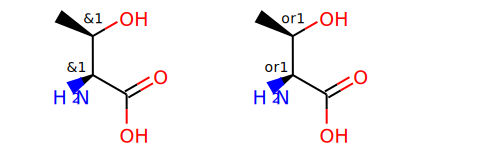

In [29]:
threonine_and = Chem.MolFromSmiles('C[C@@H](O)[C@H](N)C(O)=O |&1:1,3|')
threonine_or = Chem.MolFromSmiles('C[C@@H](O)[C@H](N)C(O)=O |o1:1,3|')
addEnhancedStereoAnnotations(threonine_and)
addEnhancedStereoAnnotations(threonine_or)
d2d = rdMolDraw2D.MolDraw2DSVG(500,150,200,150)
d2d.DrawMolecules([threonine_and,threonine_or])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())


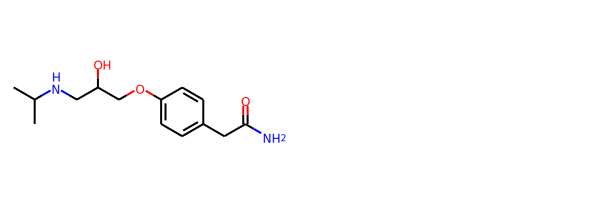

In [30]:
atenolol = Chem.MolFromSmiles('CC(C)NCC(O)COc1ccc\
(CC(N)=O)cc1')
addEnhancedStereoAnnotations(atenolol)
d2d = rdMolDraw2D.MolDraw2DSVG(600,200,300,200)
d2d.DrawMolecules([atenolol])
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [31]:
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import requests
# grab a feature definition file from the RDKit's contrib dir in github:
res = requests.get('https://raw.githubusercontent.com/rdkit/rdkit/master/Contrib/M_Kossner/BaseFeatures_DIP2_NoMicrospecies.fdef')
fdef = res.text
ffact = ChemicalFeatures.BuildFeatureFactoryFromString(fdef)

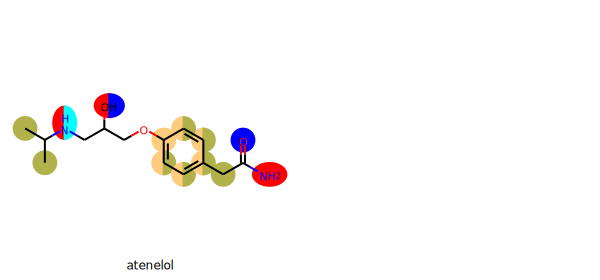

In [32]:
from collections import defaultdict
feats = ffact.GetFeaturesForMol(atenolol)
colors = {'SingleAtomDonor':(1,0,0),
          'SingleAtomAcceptor':(0,0,1),
          'BasicGroup':(0,1,1),
          'Arom6':(1,0.8,0.5),
          'Hphobe':(0.7,0.7,0.3)}
atomHighlights = defaultdict(list)
highlightRads = {}
for feat in feats:
    if feat.GetType() in colors:
        clr = colors[feat.GetType()]
        for aid in feat.GetAtomIds():
            atomHighlights[aid].append(clr)
            highlightRads[aid] = 0.5

d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
d2d.DrawMoleculeWithHighlights(atenolol,"atenelol",dict(atomHighlights),{},highlightRads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

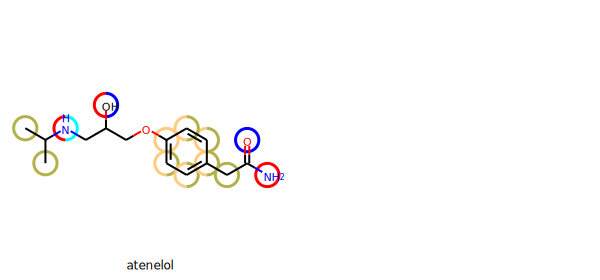

In [33]:
d2d = rdMolDraw2D.MolDraw2DSVG(600,280,300,280)
dos = d2d.drawOptions()
dos.atomHighlightsAreCircles = True
dos.fillHighlights=False
d2d.DrawMoleculeWithHighlights(atenolol,"atenelol",dict(atomHighlights),{},highlightRads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

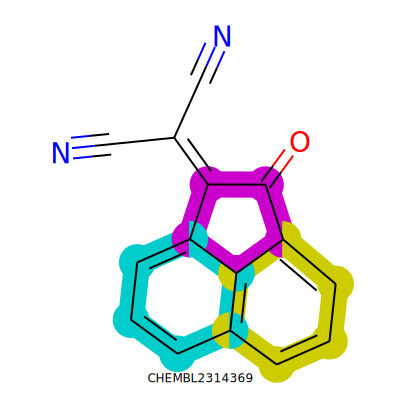

In [34]:
chembl2314369=Chem.MolFromSmiles('N#CC(C#N)=C1C(=O)c2cccc3cccc1c23')
rings = chembl2314369.GetRingInfo()

colors = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]

athighlights = defaultdict(list)
arads = {}
for i,rng in enumerate(rings.AtomRings()):
    for aid in rng:
        athighlights[aid].append(colors[i])
        arads[aid] = 0.3

bndhighlights = defaultdict(list)
for i,rng in enumerate(rings.BondRings()):
    for bid in rng:
        bndhighlights[bid].append(colors[i])
    
d2d = rdMolDraw2D.MolDraw2DSVG(400,400)
d2d.DrawMoleculeWithHighlights(chembl2314369,'CHEMBL2314369',dict(athighlights),dict(bndhighlights),arads,{})
d2d.FinishDrawing()
SVG(d2d.GetDrawingText())

In [35]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize=(450,350)
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdqueries
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
rdDepictor.SetPreferCoordGen(True)
import pandas as pd

from IPython.display import SVG,Image
from ipywidgets import interact

import rdkit
print(rdkit.__version__)

2020.03.4


In [36]:
df = pd.read_csv('cdk2_rgd_dataset.csv')
df.head()

,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
0,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265814,68026,>,...,1,Ki,>,20.00,uM,NaN,NaN,RPXWUUDZINQPTJ-UHFFFAOYSA-N,CNc1nccc(n1)c2sc(C)nc2C,CHEMBL46474
1,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265817,67880,=,...,1,Ki,=,0.14,uM,NaN,NaN,GDZTURHUKDAJGD-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccc(O)cc3)n2,CHEMBL442957
2,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267078,67751,=,...,1,Ki,=,6.50,uM,NaN,NaN,CTFDMGIBHFQWKB-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(N)n2,CHEMBL47302
3,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267081,67782,=,...,1,Ki,=,1.20,uM,NaN,NaN,HOKDXVAONYXHJK-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccccc3F)n2,CHEMBL297447
4,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267084,67961,=,...,1,Ki,=,0.11,uM,NaN,NaN,XNKSRGHGPSHYIW-UHFFFAOYSA-N,CNc1nc(C)c(s1)c2ccnc(Nc3cccc(O)c3)n2,CHEMBL44119
